In [9]:
using Revise
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info);

In [10]:
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);

In [11]:
ini.equilibrium.R0 = 4.82
ini.equilibrium.B0 = 4.71
ini.equilibrium.ip = 8e6
ini.equilibrium.ϵ = 1/3.5
ini.equilibrium.κ = 2.19
ini.equilibrium.δ = 0.7
ini.equilibrium.ζ = 0.0
ini.equilibrium.boundary_from = :scalars
ini.equilibrium.xpoints_number = 0

#display(ini)

0

In [12]:
act.ActorEquilibrium.model = :Solovev
act.ActorEquilibrium.symmetrize = false
act.ActorCHEASE.free_boundary = false

act.ActorSolovev.verbose = true
act.ActorSolovev.ngrid = 301

display(act.ActorEquilibrium)
display(act.ActorCHEASE)
display(act.ActorSolovev)

ActorEquilibrium{Float64}
├─ model ➡ :Solovev Equilibrium actor to run [:Solovev, :CHEASE]
└─ symmetrize ➡ false Force equilibrium up-down symmetry with respect to magnetic axis


ActorCHEASE{Float64}
├─ free_boundary ➡ false Convert fixed boundary equilibrium to free boundary one
├─ clear_workdir ➡ true Clean the temporary workdir for CHEASE
└─ rescale_eq_to_ip ➡ true Scale equilibrium to match Ip


ActorSolovev{Float64}
├─ ngrid ➡ 301 Grid size (for R, Z follows proportionally to plasma elongation)
├─ qstar ➡ 1.5 Initial guess of kink safety factor
├─ alpha ➡ 0.0 Initial guess of constant relating to pressure
├─ volume ➡ missing Scalar volume to match (optional)
├─ area ➡ missing Scalar area to match (optional)
└─ verbose ➡ true Verbose


 * Status: success

 * Candidate solution
    Final objective value:     1.813053e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-03

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    54
    f(x) calls:    108

 18.263144 seconds (69.10 M allocations: 2.358 GiB, 2.98% gc time, 24.41% compilation time)
GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 22.8 [keV]               ne0 → 2.25e+20 [m⁻³]           
a → 1.38 [m]                   ip → 8 [MA]                    Ti0 → 22.8 [keV]               ne_ped → 1.01e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 5.34                     <Te> → 9.75 [keV]              <ne> → 1.46e+20 [m⁻³]       

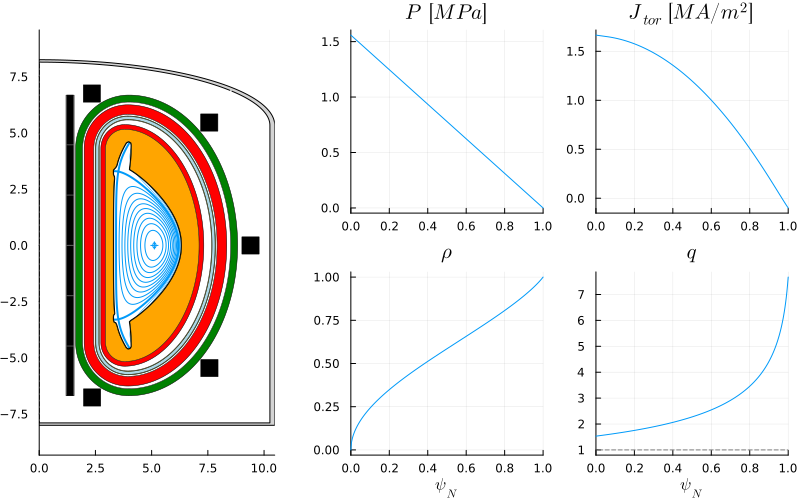

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19147     0.0       1.19147                15.9305      59.6299
   2 │ in                            oh        0.358965    1.19147   1.55044  ReBCO          4.79952     41.3429
   3 │ in                                      0.0695824   1.55044   1.62002                 0.930349     9.26654
   4 │ hfs                           tf        0.310433    1.62002   1.93045  ReBCO         10.3433     125.458
   5 │ hfs                                     0.0695824   1.93045   2.00003                 3.89189    139.015
   6 │ hfs     low temp              shield    0.428264    2.00003   2.4283 

​


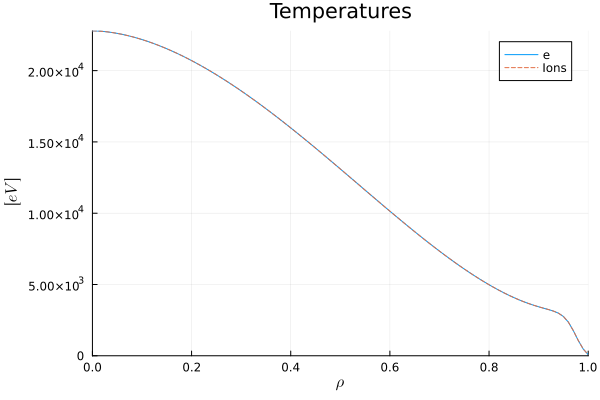

​


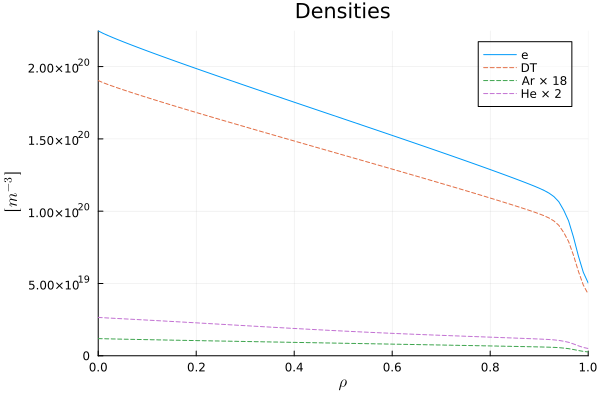

​


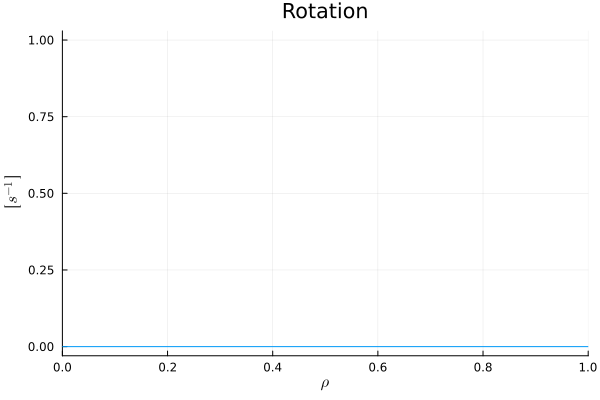

​


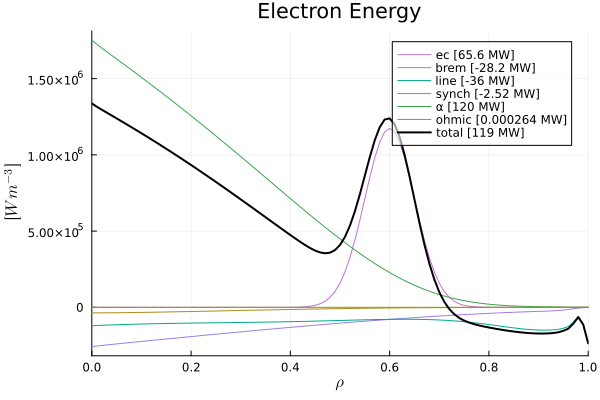

​


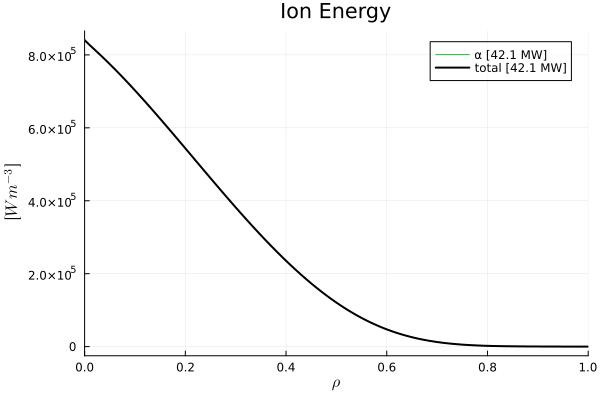

​


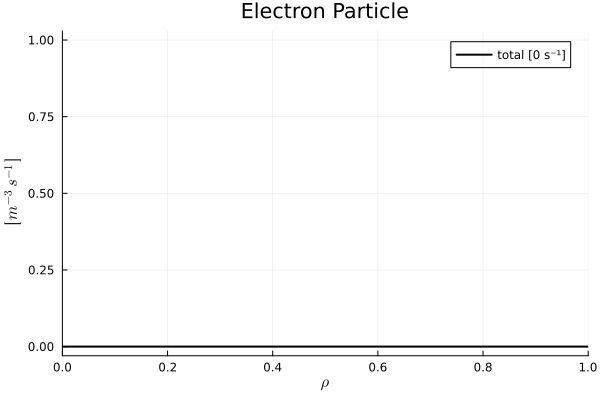

​


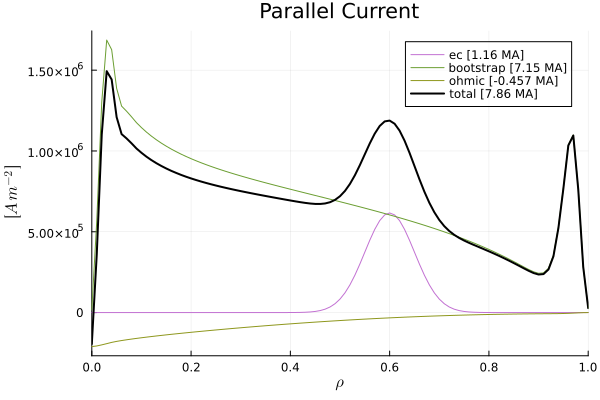

In [13]:
dd = IMAS.dd();
@time FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd);

 * Status: success

 * Candidate solution
    Final objective value:     4.486720e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-03

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    56
    f(x) calls:    112

 * Status: success

 * Candidate solution
    Final objective value:     4.534235e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-03

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    56
    f(x) calls:    112

 23.576648 seconds (129.52 M allocations: 4.004 GiB, 3.01% gc time)
GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 25 [keV]                 ne0 → 2.25e+20 

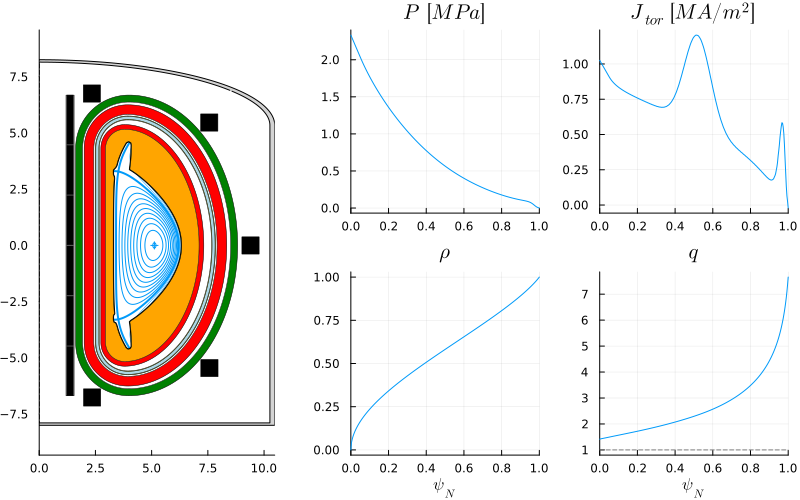

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19147     0.0       1.19147                15.9305      59.6299
   2 │ in                            oh        0.358965    1.19147   1.55044  ReBCO          4.79952     41.3429
   3 │ in                                      0.0695824   1.55044   1.62002                 0.930349     9.26654
   4 │ hfs                           tf        0.310433    1.62002   1.93045  ReBCO         10.3433     125.458
   5 │ hfs                                     0.0695824   1.93045   2.00003                 3.89189    139.015
   6 │ hfs     low temp              shield    0.428264    2.00003   2.4283 

​


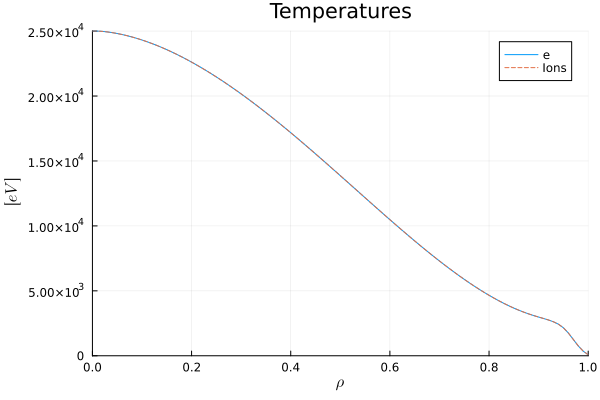

​


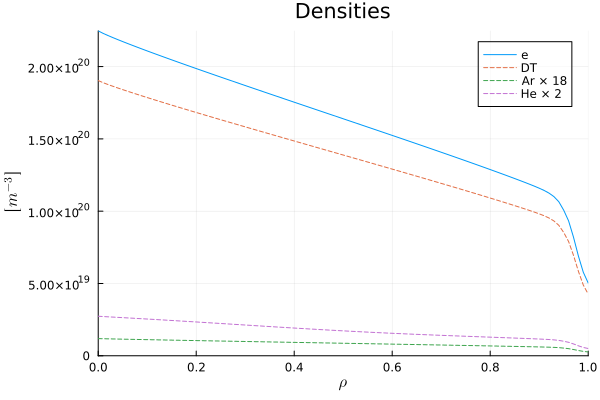

​


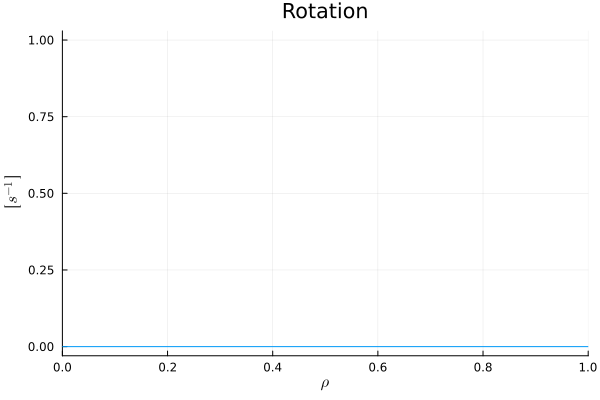

​


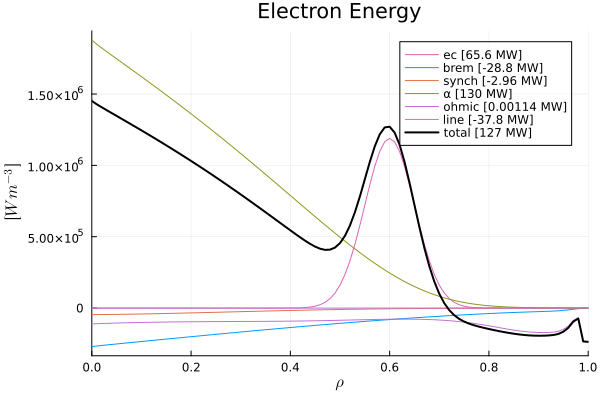

​


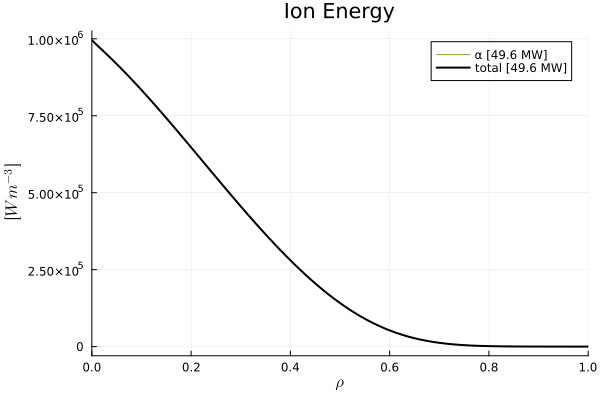

​


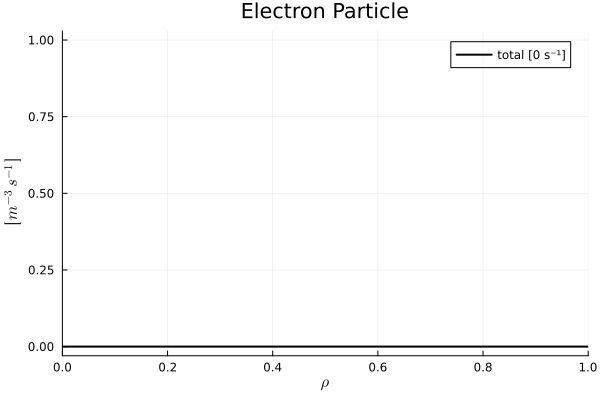

​


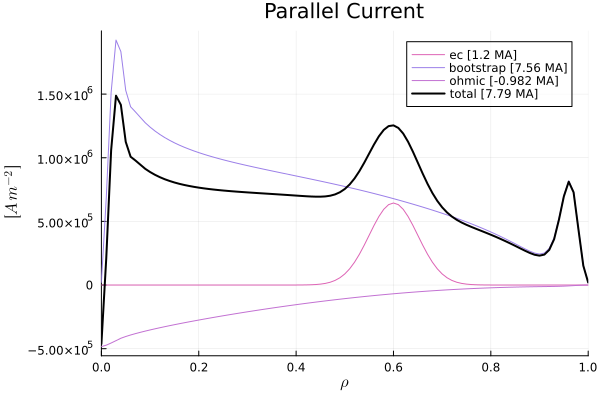

In [14]:
@time FUSE.ActorEquilibriumTransport(dd, act);
FUSE.digest(dd);